# 目录

- [数据准备](#数据准备)
- [数据处理](#数据处理)
- [描述性统计](#描述性统计)
- [可视化分析](#可视化分析)
    - [相关性热力图](#相关性热力图)
    - [不同区域的视频排名情况](#不同区域的视频排名情况)
    - [播放量排名情况](#播放量排名情况)
    - [互动类型分布情况](#互动类型分布情况)
- [随机森林特征重要性分析](#随机森林特征重要性分析)
- [视频标题词云图](#视频标题词云图)

# 数据准备

In [1]:
import pandas as pd
df = pd.read_excel('B站排行榜视频信息.xlsx')
df

,标题,作者,链接,分类,发布时间,播放数,点赞数,弹幕数,回复数,收藏数,投币数,分享数,发布位置
0,《崩坏：星穹铁道》乱破角色PV——「不乱不破」,崩坏星穹铁道,https://b23.tv/BV1yyC1YQEpk,原创音乐,2024-10-21 12:00:00,4239314,301101,7687,12109,72424,121128,47447,上海
1,aespa《Whiplash》MV,SMTOWN,https://b23.tv/BV16yyVYxEUt,MV,2024-10-21 17:12:27,2128885,129290,19559,11083,49902,67681,43832,韩国
2,aespa最新回归曲Whiplash MV公开,pcyxjy,https://b23.tv/BV1B1yVYRESW,MV,2024-10-21 17:05:09,1369760,61839,5349,9507,15642,8566,24843,广东
3,捣蛋鬼别捣蛋！我写了一首超适合万圣节的曲！,小鷹CORE,https://b23.tv/BV1jBytYoErJ,原创音乐,2024-10-20 11:30:10,452999,118473,124,714,49259,4676,1618,河北
4,准备好接受女王们的鞭挞了么？Whiplash + Her + Boss B*tch，听完我感...,啊炮w,https://b23.tv/BV11iyLYzEUt,音乐粉丝饭拍,2024-10-21 19:54:36,316290,31671,350,1170,16148,14562,7550,广东
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,论文答辩中，普通老师的学生vs大佬的学生,学术猫鼠的日常,https://b23.tv/BV1TByBYqEAe,校园学习,2024-10-21 13:27:45,640601,6604,6,94,199,40,99,安徽
1796,当代互联网最强阳谋，大丈夫报仇不过夜，才能念头通达,狐小狸bili,https://b23.tv/BV1AcpFeXEZ6,人文历史,2024-09-04 18:15:20,1618503,101244,356,376,21729,822,1261,重庆
1797,我这一生如履薄冰......,老王动物园_,https://b23.tv/BV1ZyyaYME3D,动物二创,2024-10-20 18:32:39,221811,26206,733,217,3339,1351,1640,江苏
1798,压力给到5060,淮洋易通电脑DIY,https://b23.tv/BV1hFyHYbE5q,数码,2024-10-22 18:24:04,617751,11626,16,576,258,54,45,河南


In [2]:
# 检查数据的基本信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   标题      1800 non-null   object        
 1   作者      1797 non-null   object        
 2   链接      1800 non-null   object        
 3   分类      1800 non-null   object        
 4   发布时间    1800 non-null   datetime64[ns]
 5   播放数     1800 non-null   int64         
 6   点赞数     1800 non-null   int64         
 7   弹幕数     1800 non-null   int64         
 8   回复数     1800 non-null   int64         
 9   收藏数     1800 non-null   int64         
 10  投币数     1800 non-null   int64         
 11  分享数     1800 non-null   int64         
 12  发布位置    1792 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 182.9+ KB


# 数据处理

In [3]:
# 检查缺失值
# 首先使用 df.isnull() 检查每列的缺失值情况，得到一个布尔型的数据框 missing_values。
missing_values = df.isnull()

# 计算每列的缺失值数量
# 接着通过 missing_values.sum() 计算每列缺失值的数量并打印出来。
missing_count = missing_values.sum()

# 打印每列的缺失值数量
print(missing_count)

标题      0
作者      3
链接      0
分类      0
发布时间    0
播放数     0
点赞数     0
弹幕数     0
回复数     0
收藏数     0
投币数     0
分享数     0
发布位置    8
dtype: int64


In [4]:
# 填充缺失值
# 针对 作者 和 发布位置 两列的缺失值，使用 fillna 方法将缺失值填充为 暂无。
df['作者'].fillna('暂无', inplace=True)
df['发布位置'].fillna('暂无', inplace=True)

In [5]:
# 检查重复值
duplicates = df.duplicated()

# 计算重复值的数量
duplicate_count = duplicates[duplicates].sum()

# 打印重复值的数量
print(f"共有 {duplicate_count} 行重复值。")

共有 93 行重复值。


In [6]:
# 保留第一次出现的行，将其余重复行删除
df = df.drop_duplicates(keep='first')

In [7]:
# 检查重复行
new_duplicates = df.duplicated()

# 计算重复值的数量
new_duplicate_count = new_duplicates[new_duplicates].sum()

# 打印重复值的数量
print(f"处理后共有 {new_duplicate_count} 行重复值。")

处理后共有 0 行重复值。


In [8]:
# 再次检查数据的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 0 to 1798
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   标题      1707 non-null   object        
 1   作者      1707 non-null   object        
 2   链接      1707 non-null   object        
 3   分类      1707 non-null   object        
 4   发布时间    1707 non-null   datetime64[ns]
 5   播放数     1707 non-null   int64         
 6   点赞数     1707 non-null   int64         
 7   弹幕数     1707 non-null   int64         
 8   回复数     1707 non-null   int64         
 9   收藏数     1707 non-null   int64         
 10  投币数     1707 non-null   int64         
 11  分享数     1707 non-null   int64         
 12  发布位置    1707 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 186.7+ KB


# 描述性统计

In [9]:
df.describe()

,播放数,点赞数,弹幕数,回复数,收藏数,投币数,分享数
count,1.707000e+03,1.707000e+03,1.707000e+03,1707.000000,1.707000e+03,1.707000e+03,1707.000000
mean,8.496907e+05,3.881642e+04,3.085067e+03,931.324546,1.283744e+04,8.995897e+03,3797.312244
std,5.192147e+06,1.452447e+05,7.346597e+04,4142.350122,1.018845e+05,1.172946e+05,37103.738849
min,6.512000e+03,4.100000e+01,0.000000e+00,0.000000,1.400000e+01,1.000000e+00,0.000000
25%,1.480730e+05,5.343000e+03,4.300000e+01,144.500000,8.480000e+02,1.785000e+02,90.000000
50%,3.272990e+05,1.659300e+04,1.730000e+02,366.000000,2.637000e+03,6.100000e+02,360.000000
75%,7.310690e+05,4.176600e+04,6.845000e+02,819.000000,7.851500e+03,2.616000e+03,1352.500000
max,1.688650e+08,4.844367e+06,3.017240e+06,142366.000000,2.876865e+06,4.165012e+06,990967.000000


# 可视化分析

## 相关性热力图

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 确保matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

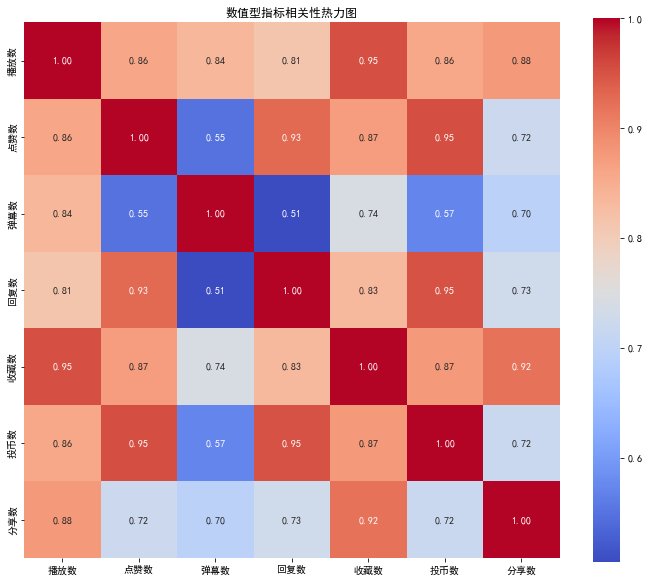

In [11]:
# 选择数值型列
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 计算相关系数矩阵
corr_matrix = df[numeric_cols].corr()

# 绘制热力图
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('数值型指标相关性热力图')
plt.show()

## 不同区域的视频排名情况

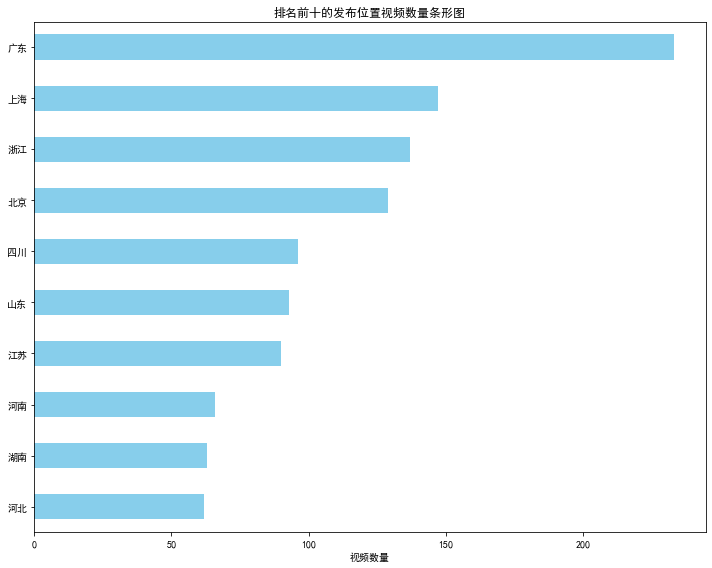

In [12]:
# 统计每个发布位置的视频数量
location_counts = df['发布位置'].value_counts()

# 选取排名前十的发布位置
top_locations = location_counts.head(10)

# 绘制水平条形图
plt.figure(figsize=(10, 8))  
top_locations.plot(kind='barh', color='skyblue')  

plt.xlabel('视频数量')
plt.title('排名前十的发布位置视频数量条形图')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

## 播放量排名情况

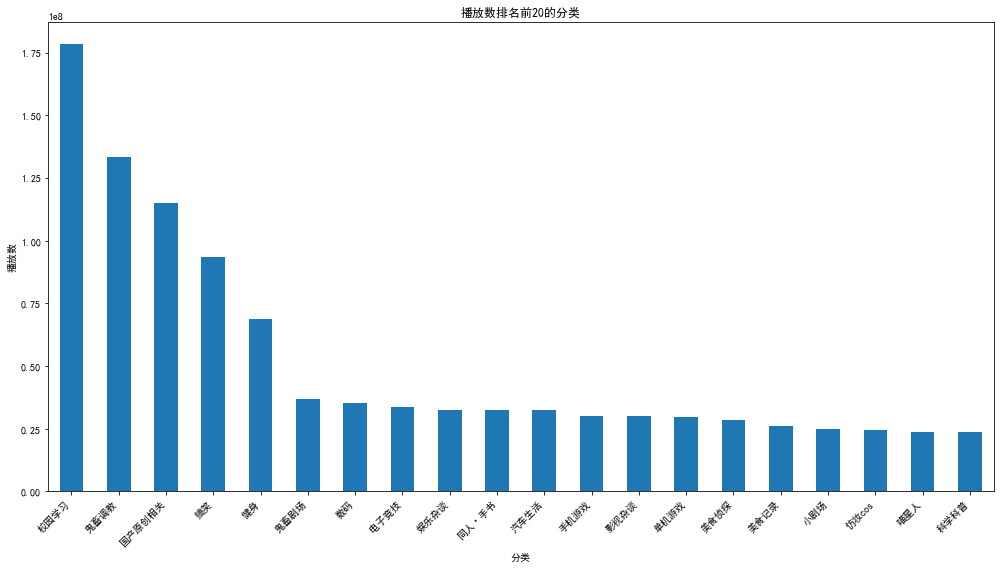

In [13]:
# 按照播放数对分类进行排序，并取出前20个分类
top_categories = df.groupby('分类')['播放数'].sum().sort_values(ascending=False).head(20)

# 绘制条形图
plt.figure(figsize=(14, 8))
top_categories.plot(kind='bar')
plt.title('播放数排名前20的分类')
plt.xlabel('分类')
plt.ylabel('播放数')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

## 互动类型分布情况

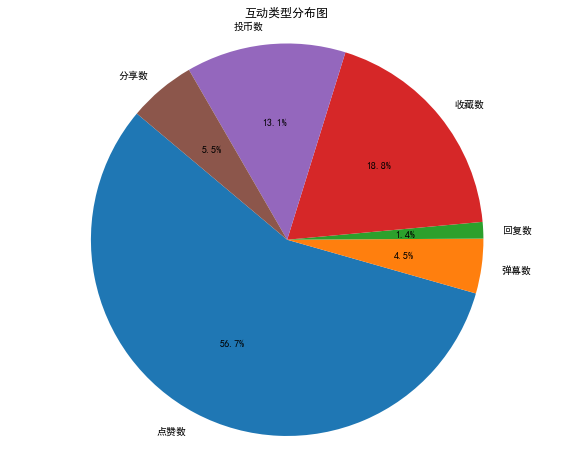

In [14]:
# 指定要绘制饼状图的列
columns_to_plot = ['点赞数', '弹幕数', '回复数', '收藏数', '投币数', '分享数']

# 计算每个指标的总和
totals = df[columns_to_plot].sum()

# 绘制饼状图
plt.figure(figsize=(10, 8))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140)
plt.title('互动类型分布图')
plt.axis('equal') 
plt.show()

# 随机森林特征重要性分析


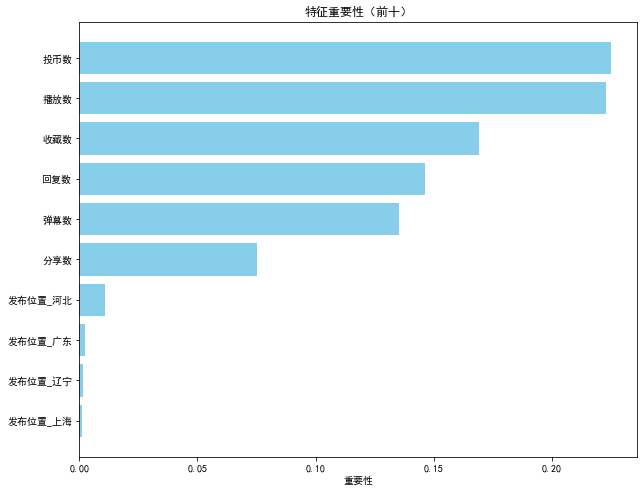

In [19]:
# 通过随机森林模型来评估不同特征对预测目标变量（点赞数）的贡献度，并可视化显示了最重要的几个特征

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df[['播放数', '弹幕数', '回复数', '收藏数', '投币数', '分享数', '发布时间', '发布位置']]
y = df['点赞数']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数值特征和分类特征
numerical_features = ['播放数', '弹幕数', '回复数', '收藏数', '投币数', '分享数']
categorical_features = ['发布位置']

# 创建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# 定义随机森林模型
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 获取特征重要性
feature_importances = model.named_steps['regressor'].feature_importances_

# 获取特征名称
# 新版本的scikit-learn才有get_feature_names_out()否则会出现：'OneHotEncoder' object has no attribute 'get_feature_names_out'
feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# 遇到'OneHotEncoder' object has no attribute 'get_feature_names_out'这个问题可以升级scikit-learn的版本也可以注释上面一行的代码
# 使用下面部分的代码也可以解决这个问题，通过遍历 OneHotEncoder 的 categories_ 属性来手动构建编码后的特征名称：
# onehot_encoder = model.named_steps['preprocessor'].named_transformers_['cat']
# encoded_feature_names = []
# for i, cat_feature in enumerate(categorical_features):
#     for category in onehot_encoder.categories_[i]:
#         encoded_feature_names.append(f"{cat_feature}_{category}")

# feature_names = numerical_features + encoded_feature_names


# 创建特征重要性的DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 选择排名前十的特征
top_features = feature_importance_df.head(10)

# 绘制特征重要性图
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('重要性')
plt.title('特征重要性（前十）')
plt.gca().invert_yaxis()  
plt.show()

# 视频标题词云图

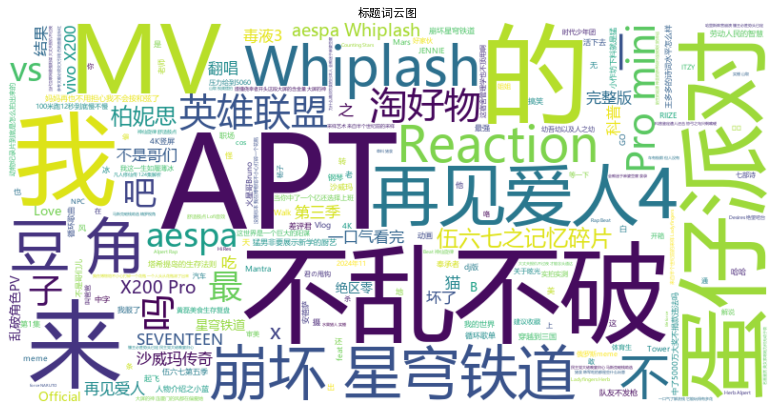

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# 首先将数据框 df 中所有的 标题 列数据合并成一个字符串 all_titles。
all_titles = ' '.join(df['标题'])

# 设置中文字体路径
font_path = 'msyh.ttc'  

# 创建 WordCloud 对象，设置字体路径、宽度、高度、背景颜色等参数，并通过 generate 方法基于 all_titles 生成词云。
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(all_titles)

# 利用 matplotlib 绘制词云图，设置图的大小、以双线性插值方式显示词云、关闭坐标轴、设置标题等，最后展示出 标题词云图。
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('标题词云图')
plt.show()